In [1]:
# Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import tree
import joblib


In [4]:
# Read in the products.csv file
products = "../Data/products.csv"
products_df = pd.read_csv(products)
products_df.head()

,brand,key,name,subhead,description,rating,rating_count,ingredients
0,bj,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR, WATER, BROWN S..."
1,bj,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR, WATER, SUGAR, ..."
2,bj,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR, SKIM MILK, WATER, SUGAR, ..."
3,bj,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR, WATER, CORN S..."
4,bj,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR, SUGAR, ..."


In [5]:
# Drop the "description" column. looks like marketing language.
products_trim_df = products_df.drop(columns=['description'])
products_trim_df.to_csv("../Data/products_trim.csv", index=False)

In [6]:
# Create a list of unique ingredients in the dataset with a count of how many times each ingredient is used.
ingredient_list = products_trim_df.ingredients.unique()
unique_ingredient_dict = {}
    # Iterate through the outer list and create a dictionary of unique ingredients with a count for each
for ingredient in ingredient_list:
    i = ingredient.split(', ')
    for i_list in i:
        if i_list != "":
            if i_list not in unique_ingredient_dict:
                    unique_ingredient_dict[i_list]=1
            else:
                    unique_ingredient_dict[i_list]=unique_ingredient_dict[i_list]+1
# print(unique_ingredient_dict)
    

In [7]:
# Sort the unique ingredients by count in descending order
sorted(unique_ingredient_dict.items(),key=lambda x:x[1],reverse=True)


[('SUGAR', 309),
 ('CREAM', 250),
 ('SALT', 215),
 ('NATURAL FLAVOR', 165),
 ('SKIM MILK', 162),
 ('SOY LECITHIN', 158),
 ('COCONUT OIL', 145),
 ('CORN SYRUP', 140),
 ('WATER', 132),
 ('EGG YOLKS', 126),
 ('VANILLA EXTRACT', 118),
 ('MILK', 115),
 ('COCOA', 99),
 ('GUAR GUM', 82),
 ('WHEAT FLOUR', 75),
 ('BAKING SODA', 72),
 ('BUTTER', 71),
 ('CARRAGEENAN', 63),
 ('PECTIN', 62),
 ('CHOCOLATE', 62),
 ('WHEY', 62),
 ('VEGETABLE GUMS', 62),
 ('LIQUID SUGAR', 60),
 ('SOYBEAN OIL', 58),
 ('COCOA BUTTER', 57),
 ('MONO AND DIGLYCERIDES', 56),
 ('CAROB BEAN', 50),
 ('GUAR', 49),
 ('COCOA PROCESSED WITH ALKALI', 45),
 ('DEXTROSE', 45),
 ('CAROB BEAN GUM', 44),
 ('MOLASSES', 35),
 ('PEANUTS', 31),
 ('VITAMIN A PALMITATE', 30),
 ('DUTCHED COCOA', 30),
 ('CANOLA OIL', 29),
 ('CANE SUGAR', 29),
 ('BROWN SUGAR', 28),
 ('CORN STARCH', 28),
 ('NATURAL FLAVORS', 28),
 ('EGGS', 27),
 ('PEANUT OIL', 27),
 ('MILK FAT', 26),
 ('PALM OIL', 26),
 ('COCOA POWDER', 24),
 ('ANNATTO', 24),
 ('TARA', 24),
 ('LEMO

In [8]:
#count the number of unique ingredients
len(unique_ingredient_dict)

414

In [9]:
# Create a dataframe from the unique ingredients dictionary
unique_ingredient_df = pd.DataFrame.from_dict({'Ingredients': unique_ingredient_dict.keys(), 'Count': unique_ingredient_dict.values()})


In [10]:
#Save the data as a .csv
unique_ingredient_df.to_csv("../Data/ingredients.csv")

In [11]:
# Read in the hand selected list of 64 ingredients from the .csv created from Excel file and create a dataframe.
final_ingredients = "../Data/finalingredients.csv"
final_ingredients_df = pd.read_csv(final_ingredients)
final_ingredients_df

,Ingredients,Count
0,SUGAR,309
1,CREAM,250
2,SALT,215
3,SKIM MILK,162
4,SOY LECITHIN,158
...,...,...
59,MANGO,1
60,PEANUT BUTTER,1
61,PINEAPPLE,1
62,RAISINS,1


In [12]:
# Drop the "Count" column to get a dataframe with only the ingredients sorted in descending order by count. 
#This will be used in the javascript file to collect the ingredients selected by the user in the order needed ofr our model.
just_ingredients = final_ingredients_df.drop(columns=["Count"])
just_ingredients

,Ingredients
0,SUGAR
1,CREAM
2,SALT
3,SKIM MILK
4,SOY LECITHIN
...,...
59,MANGO
60,PEANUT BUTTER
61,PINEAPPLE
62,RAISINS


In [13]:
# Save  this as a json file
just_ingredients.to_json(r'../Data/just_ingredients.json')

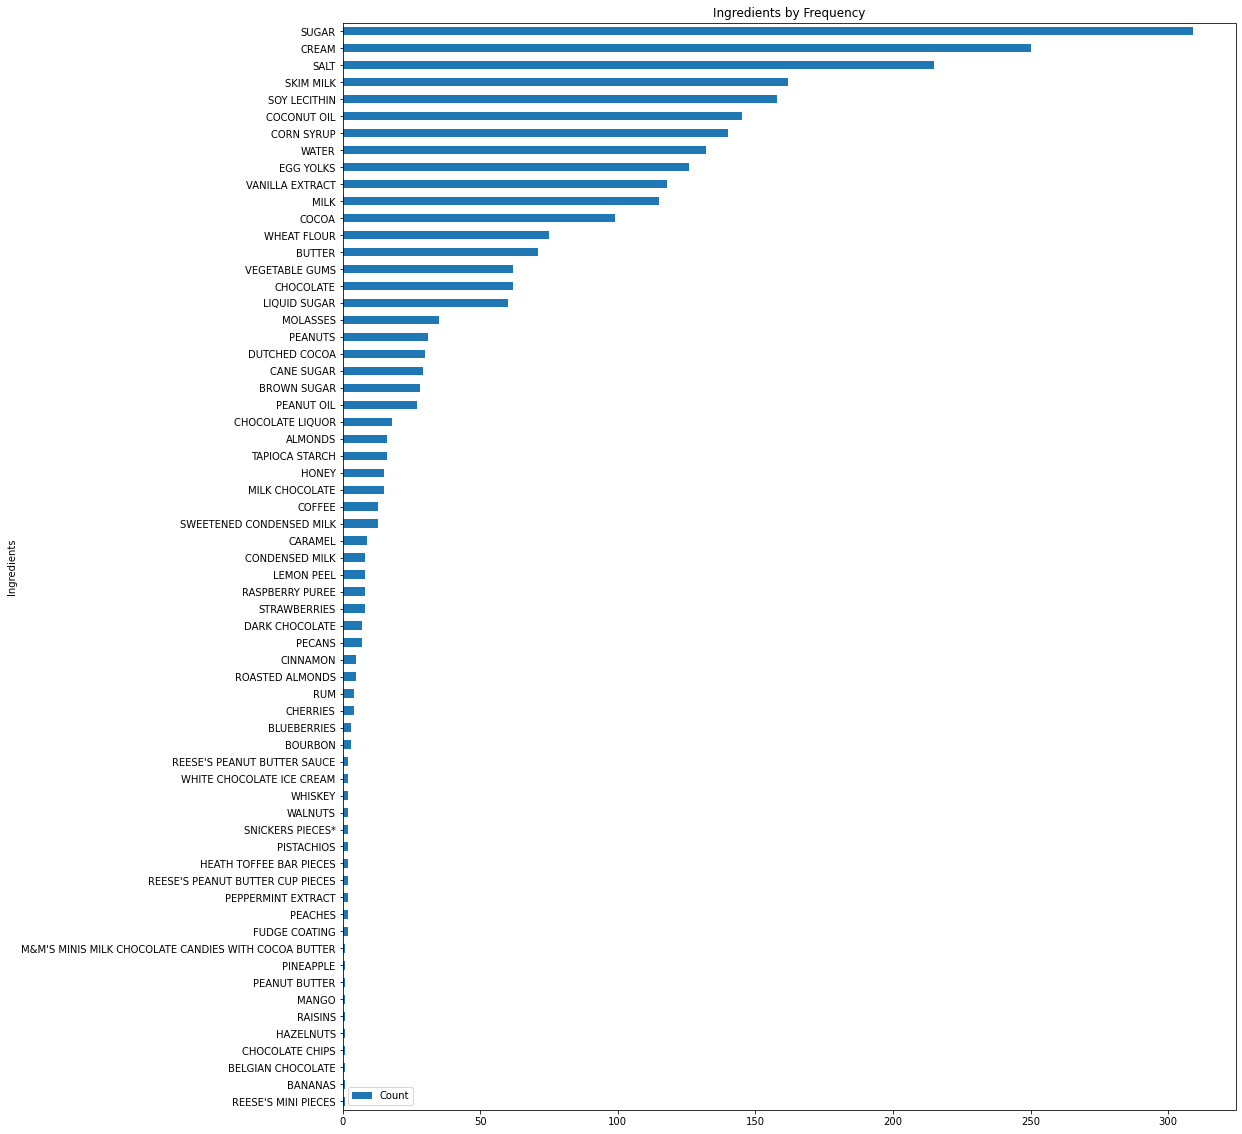

In [14]:
# Plot the 64 ingredients by frequency of use.
final_ingredients_df=final_ingredients_df.sort_values(by=['Count'], ascending=True)
final_ingredients_df.plot.barh(x='Ingredients',y='Count', figsize=(16,20))
plt.title("Ingredients by Frequency")
plt.savefig("../Data/ingredients_frequency.png")

In [15]:
#Read in the data for the model using the 64 ingredients and create a dataframe
model = "../Data/final_model.csv"
model_df = pd.read_csv(model)

model_df

,rating,SUGAR,CREAM,SALT,SKIM MILK,SOY LECITHIN,COCONUT OIL,CORN SYRUP,WATER,EGG YOLKS,...,BANANAS,BELGIAN CHOCOLATE,CHOCOLATE CHIPS,HAZELNUTS,M&M'S MINIS MILK CHOCOLATE CANDIES WITH COCOA BUTTER,MANGO,PEANUT BUTTER,PINEAPPLE,RAISINS,REESE'S MINI PIECES
0,3.7,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,4.0,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3.6,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4.5,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,4.0,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
237,4.7,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
238,2.5,1,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
239,3.2,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Prepare labels and features data for model
X = model_df.drop("rating", axis=1)
y= model_df["rating"].values.reshape(-1, 1)
print(X.shape, y.shape)
model_df = model_df.astype(float)

(241, 64) (241, 1)


In [17]:
#Create train & test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5074318377444531
Testing Score: -1.1570313936779741e+24


In [19]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train.reshape(len(y_train),))
print(rf.score(X_test, y_test.reshape(len(y_test),)))
print(rf.score(X_train, y_train.reshape(len(y_train),)))

-0.016054417546613076
0.8273244577527481


In [20]:
# Predict the rating of one of the ice cream flavors in the dataset
import numpy as np

temp = X_train.to_numpy()
rf.predict([temp[0]])

array([3.35675])

In [24]:
# Save the model
joblib.dump(rf, "rf.joblib")

['rf.joblib']

In [25]:
# Test loading and running the loaded model
loaded_rf = joblib.load("rf.joblib")
loaded_rf.predict([temp[0]])

array([3.35675])

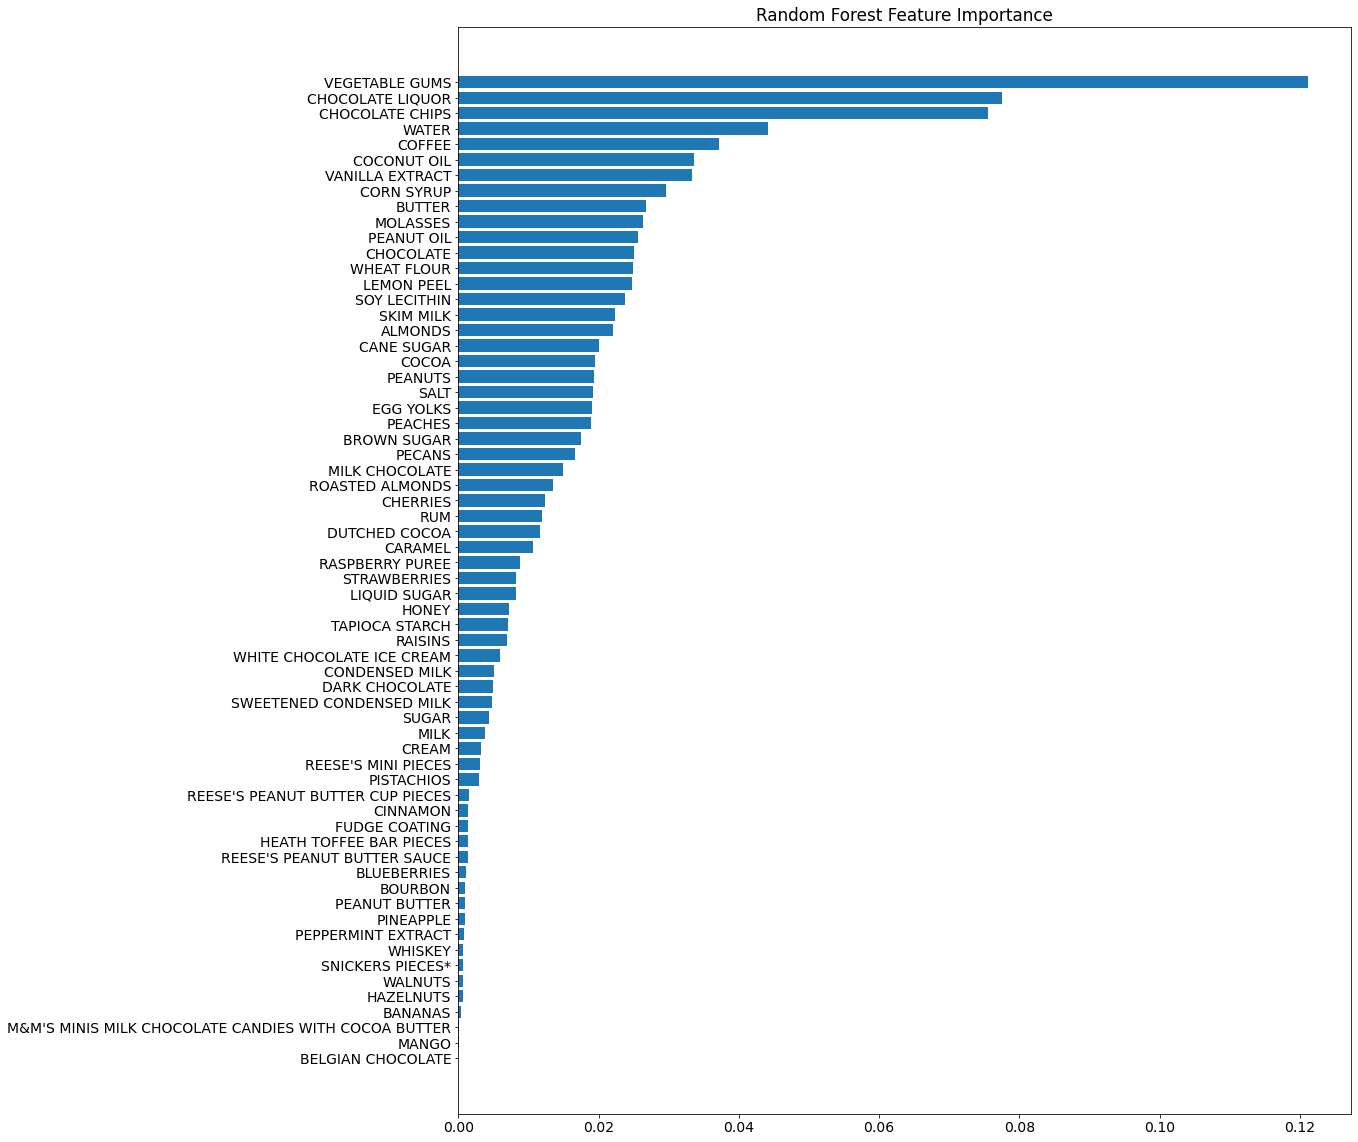

In [26]:
# Plot the ingredients by their Importance in the model in descending order
from sklearn.inspection import permutation_importance

plt.rcParams.update({'figure.figsize': (16.0, 20.0)})
plt.rcParams.update({'font.size': 14})
sorted_idx = loaded_rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], loaded_rf.feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance")
plt.savefig("../Data/ingredients_importance.png")